# Simple tests for QSO templates [v1.2]

In [1]:
# imports
from imp import reload
from matplotlib import pyplot as plt
from desisim import templates as dst
from desisim import lya_spectra as dslya

## Generate 100 

In [2]:
# Instantiate
reload(dst)
qso = dst.QSO()

ERROR:templates.py:1613:__init__: Please upgrade desitarget to get the latest isQSO_colors function.


In [3]:
flux, wave, metadata = qso.make_templates(nmodel=100)

In [4]:
%matplotlib notebook

<IPython.core.display.Javascript object>


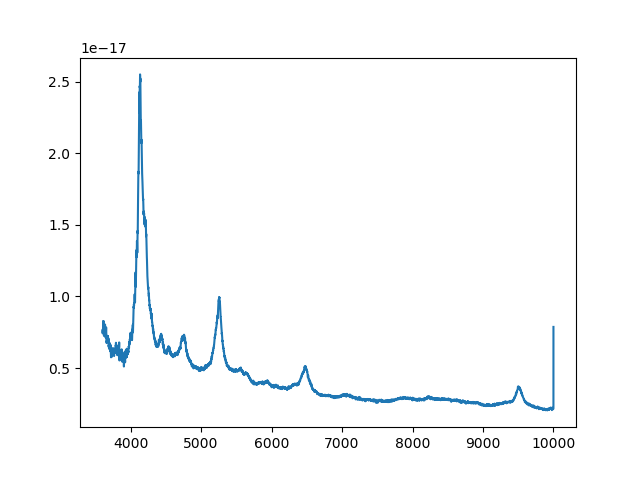

In [5]:
plt.clf()
plt.plot(wave, flux[0,:])
plt.show()
#plt.close()

## Test forest

In [7]:
flux2, wave2, meta = dslya.get_spectra('/u/xavier/Dropbox/DESI/lya_forest/v0.0.2/simpleSpec_0.fits.gz', nqso=100)

ERROR:templates.py:1613:__init__: Please upgrade desitarget to get the latest isQSO_colors function.


In [8]:
meta[0:10]

OBJTYPE,SUBTYPE,TEMPLATEID,SEED,REDSHIFT,MAG,DECAM_FLUX [6],WISE_FLUX [2],OIIFLUX,HBETAFLUX,EWOII,EWHBETA,D4000,VDISP,OIIDOUBLET,OIIIHBETA,OIIHBETA,NIIHBETA,SIIHBETA,ZMETAL,AGE,TEFF,LOGG,FEH,RA,DEC
,,,,,,,,erg / (cm2 s),erg / (cm2 s),Angstrom,Angstrom,,km / s,,dex,dex,dex,dex,,Gyr,K,m / s2,,,
str10,str10,int64,int64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64
QSO,,0,2212909121,1.992397,19.98083,0.0 .. 0.0,0.0 .. 0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.42502314649,-0.0494851189526
QSO,,1,2265134304,1.843431,19.55591,0.0 .. 0.0,0.0 .. 0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3.02093749163,-0.175233524237
QSO,,2,3430460360,1.891006,22.64008,0.0 .. 0.0,0.0 .. 0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.39515037193,-0.00499229490331
QSO,,3,2497158871,2.8916,21.07519,0.0 .. 0.0,0.0 .. 0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.257372313075,-0.0978789232551
QSO,,4,838423299,2.603477,23.1749,0.0 .. 0.0,0.0 .. 0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.72207347605,1.17121296036
QSO,,5,3510865764,2.819696,20.7423,0.0 .. 0.0,0.0 .. 0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.3368309504,-0.0538803673266
QSO,,6,3542512548,2.197225,23.0926,0.0 .. 0.0,0.0 .. 0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,6.19701519745,-0.0238289415161
QSO,,7,4141865217,2.243147,20.99871,0.0 .. 0.0,0.0 .. 0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.89010311477,0.24451264666


### Plot

<IPython.core.display.Javascript object>


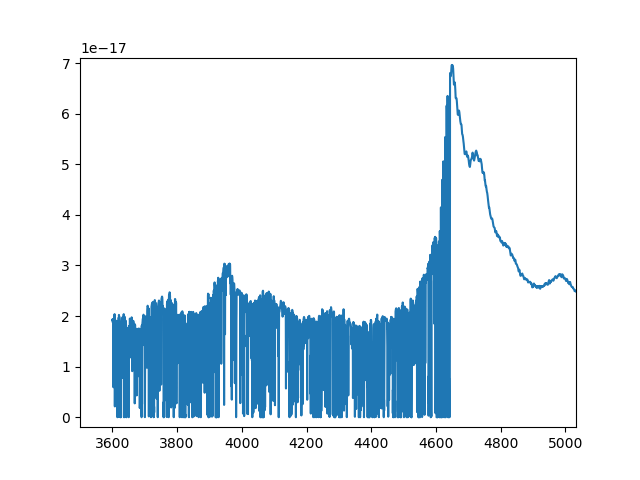

In [10]:
plt.clf()
plt.plot(wave2, flux2[5,:])
plt.show()

## Test forest + DLA

In [18]:
reload(dslya)
flux3, wave3, meta, dla_meta= dslya.get_spectra('/u/xavier/Dropbox/DESI/lya_forest/v0.0.2/simpleSpec_0.fits.gz', nqso=100, add_dlas=True)

ERROR:templates.py:1613:__init__: Please upgrade desitarget to get the latest isQSO_colors function.


### DLA meta

In [20]:
dla_meta

NHI,z,ID
float64,float64,int64
19.7278873227,2.36041212183,5
20.0840823128,2.29242549158,16
19.7262371158,3.41063448164,55
19.8368620633,2.98016322465,56


### Plot

In [21]:
flux3.shape

(100, 32001)

<IPython.core.display.Javascript object>


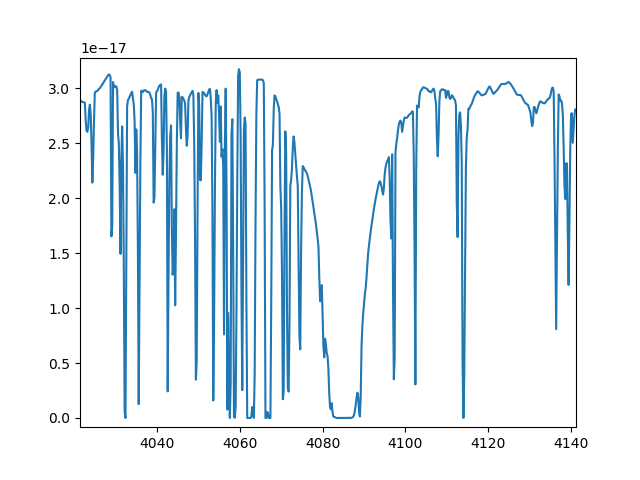

In [23]:
plt.clf()
plt.plot(wave3, flux3[5,:])
plt.show()